In [35]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd

df = pd.read_csv("C:/Users/Vineet Kumar/Downloads/kidnapping.csv")
df.head()

,STATE/UT,YEAR,Purpose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,...,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total,Male below 18,Female below 18,Number of children,Label
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,...,0,0,0,3,5,8,3,1,4,F
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,...,0,0,0,2,0,2,2,0,2,M
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,F
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,...,2,0,0,0,78,78,0,51,51,F
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,...,4,0,0,7,332,339,1,237,238,F


In [36]:
df = df.drop(['Total No. of cases reported'], axis=1)
df = df.drop(['Male upto 10 years'], axis=1)
df = df.drop(['Female upto 10 years'], axis=1)
df = df.drop(['Male 10-15 years'], axis=1)
df = df.drop(['Female 10-15 years'], axis=1)
df = df.drop(['Male 15-18 years'], axis=1)
df = df.drop(['Female 15-18 years'], axis=1)
df = df.drop(['Total Male'], axis=1)
df = df.drop(['Total Female'], axis=1)
df = df.drop(['Number of children'], axis=1)
df = df.drop(['Label'], axis=1)

df.head()

,STATE/UT,YEAR,Purpose,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Grand Total,Male below 18,Female below 18
0,Andhra Pradesh,2001,For Adoption,0,4,0,0,0,0,8,3,1
1,Andhra Pradesh,2001,For Begging,0,0,0,0,0,0,2,2,0
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,0,25,0,2,0,0,78,0,51
4,Andhra Pradesh,2001,For marriage,6,91,0,4,0,0,339,1,237


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_df(dataframe):
    le = LabelEncoder()
    for column in dataframe.columns:
        dataframe[column] = le.fit_transform(dataframe[column])
    return dataframe

#encode the dataframe
data=encode_df(df)

print(data)

      STATE/UT  YEAR  Purpose  Male 18-30 years  Female 18-30 years  \
0            1     0        0                 0                   4   
1            1     0        1                 0                   0   
2            1     0        2                 0                   0   
3            1     0        3                 0                  25   
4            1     0       10                 6                  91   
5            1     0        4                 0                  16   
6            1     0        5                 2                   0   
7            1     0        6                11                   4   
8            1     0        7                 0                   0   
9            1     0        8                 0                   0   
10           1     0        9                 0                   0   
11           1     0       11                54                  52   
12           1     0       13               140                 146   
13    

In [38]:
X = df.iloc[:, df.columns != '2']
#X = df.iloc[:, 0:4].values 
y = df.iloc[:, 2].values 

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """


In [55]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[90  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 89  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 87  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 67  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 84  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 86  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 82  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 86  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 80  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 70  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  2 93  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        89
           3       0.99      1.00      0.99        91
           4       1.00      0.98      0.99        89
           5       0.99      0.97      0.98 

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """


In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[248   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 242   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 260   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 246   3   1   0   0   0   0   1   0   0   0]
 [  0   0   0   2 247   7   1   0   0   0   0   0   0   0]
 [  0   0   0   1   2 236  13   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2 218   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11 255   1   1   3   0   1   0]
 [  0   0   0   0   0   0   1   2 260   0   1   0   0   0]
 [  0   0   0   0   0   0   2   3   1 238   2   4   0   0]
 [  0   0   0   0   2   0   0   1   0   3 247   0   0   0]
 [  0   0   0   0   0   0   0   1   0   2   5 222   7   1]
 [  0   0   0   0   0   0   0   0   0   1   4  16 231   6]
 [  0   0   0   0   0   0   0   0   0   0   1  10   8 231]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00       243
          

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """


In [64]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[293   0   0   0   0   3   0   0   0   0   0   0   0   0]
 [  1 274   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 306   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 293   6   2   0   0   0   0   1   0   0   0]
 [  0   0   0   7 275   8   0   0   0   0   0   0   0   0]
 [  0   0   0   2   5 278   4   0   0   0   0   1   0   0]
 [  0   0   0   0   1   3 268   5   0   0   0   1   0   0]
 [  0   0   0   1   1   0  14 286   1   0   2   0   1   0]
 [  0   0   0   0   0   0   3   0 305   0   1   0   0   0]
 [  0   0   0   0   0   0   2   1   1 275   3   8   1   0]
 [  0   0   0   0   0   0   0   2   0   2 284   0   1   0]
 [  0   0   0   0   0   0   0   0   0   2   6 266   7   1]
 [  0   0   0   0   0   0   0   0   0   3   2  23 262   7]
 [  0   0   0   0   0   0   0   0   0   0   0  11  10 275]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       296
           1       1.00      1.00      1.00       275
          

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """


In [68]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[330   0   0   1   0   2   0   0   0   0   0   0   0   0]
 [  2 327   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0 349   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2 320  15   1   0   0   0   0   1   0   0   0]
 [  0   0   0  19 302  10   0   0   0   0   3   0   0   0]
 [  0   0   0   6  15 294   8   1   0   1   0   1   1   0]
 [  0   0   0   1   3   7 308   9   0   0   0   1   0   0]
 [  0   0   0   1   2   0  23 316   1   2   3   0   1   0]
 [  0   0   0   0   0   0   2   0 335   0   2   0   0   0]
 [  0   0   0   0   0   0   8   0   1 308   4  14   1   0]
 [  0   0   0   0   0   0   0   0   0   6 326   0   0   0]
 [  0   0   0   0   0   1   0   0   0   2   9 304   6   0]
 [  0   0   0   0   0   0   0   1   0   2   5  28 294   8]
 [  0   0   0   0   0   0   0   0   0   0   1  12   6 313]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       1.00      0.99      0.99       331
          

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vineet Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """


In [72]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0) 

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import scikit-learn metrics module for accuracy calculation

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

# Model Accuracy, how often is the classifier correct?
print(accuracy_score(y_test, y_pred))

[[375   0   0   3   0   5   0   0   0   0   0   0   0   0]
 [ 20 352   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0 382   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0  21 323  25   2   0   0   0   0   5   0   0   0]
 [  0   0   0  44 323   8   0   0   0   0   3   0   0   0]
 [  1   0   0   7   7 317  31   6   0   0   0   1   3   0]
 [  0   0   0   0   6  23 316  18   0   0   0   1   3   0]
 [  0   0   0   1  12   3  41 280  32   2  17   0   1   0]
 [  0   0   0   0   0   0   1   4 373   0   3   0   0   0]
 [  0   0   0   0   0   0  17   1   1 343   5  12   0   0]
 [  0   0   0   0   0   0   3   0   0   0 352  15   3   0]
 [  0   0   0   0   0   0   1   0   2   2  13 336  17   0]
 [  0   0   0   0   0   0   0   0   1   2  11  42 320   6]
 [  0   0   0   0   0   0   0   0   0   0   4   8   0 356]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       383
           1       1.00      0.94      0.97       374
          

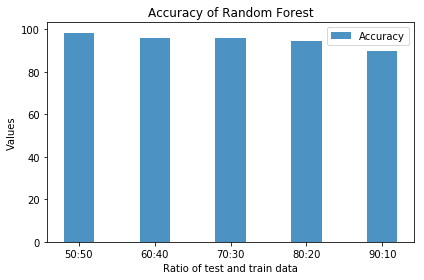

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data to plot
n_groups =5 
accuracy1=98.29
accuracy2=96.05
accuracy3=95.93
accuracy4=94.31
accuracy5=89.92

means_accuracy=(accuracy1,accuracy2,accuracy3,accuracy4,accuracy5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.8
 
sns.set_color_codes("pastel")
rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity,
                 label='Accuracy')
  
plt.xlabel('Ratio of test and train data')
plt.ylabel('Values')
plt.title('Accuracy of Random Forest')
plt.xticks(index, ('50:50', '60:40', '70:30','80:20','90:10'))
plt.legend()
 
plt.tight_layout()
plt.show()